In [2]:
import pandas as pd
df = pd.read_csv("daily_stock_data_with_indices_vol.csv")
stocks_file = "daily_stock_data_with_indices_vol.csv"

# Assuming the daily return column is named "DailyReturn" (change it if needed)
return_col = "Daily_Return"

# Ensure the column exists
if return_col in df.columns:
    df["Direction"] = df[return_col].apply(lambda x: "Up" if x > 0 else "Down")

df.to_csv(stocks_file)

In [1]:
import pandas as pd

# Load the datasets
comments_file = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
stocks_file = "daily_stock_data_with_indices_vol.csv"  # Update with the correct file path

df_comments = pd.read_csv(comments_file)

df_stocks = pd.read_csv(stocks_file)

# Convert Timestamp and Date columns to datetime
df_comments.columns = df_comments.columns.str.strip()
df_comments["Timestamp"] = pd.to_datetime(df_comments["Timestamp"], errors='coerce')
df_comments.dropna(subset=["Timestamp"], inplace=True)
df_comments["Date"] = df_comments["Timestamp"].dt.date

df_stocks.columns = df_stocks.columns.str.strip()
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"], format='mixed', errors='coerce').dt.date


# Count total comments per day
total_comments = df_comments.groupby("Date").size()

# Count sentiment-based comments per day
sentiment_counts = df_comments.groupby(["Date", "Sentiment"]).size().unstack(fill_value=0)
print(sentiment_counts.head())



#Merge comment data with stock data
df_merged = df_stocks.copy()
df_merged["Total Comments"] = df_merged["Date"].map(total_comments).fillna(0).astype(int)
df_merged["Negative Comments"] = df_merged["Date"].map(sentiment_counts.get("Negative", 0)).fillna(0).astype(int)
df_merged["Positive Comments"] = df_merged["Date"].map(sentiment_counts.get("Positive", 0)).fillna(0).astype(int)
df_merged["Neutral Comments"] = df_merged["Date"].map(sentiment_counts.get("Neutral", 0)).fillna(0).astype(int)
df_merged.to_csv("New_Merge.csv")

Sentiment   Error  Negative  Neutral  Positive
Date                                          
2024-03-07      0        75       63        21
2024-03-08      0        30       60        23
2024-03-09      0        32       54        40
2024-03-10      0         7       16         3
2024-03-11      0        51       28         9


In [ ]:
import pandas as pd

# Load datasets
comments_file = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
stocks_file = "cleaned_final_merged_stock_topic_sentiment.csv"  # Update with the correct file path

df_comments = pd.read_csv(comments_file)
df_stocks = pd.read_csv(stocks_file)

# Convert Timestamp and Date columns to datetime
df_comments.columns = df_comments.columns.str.strip()
df_comments["Timestamp"] = pd.to_datetime(df_comments["Timestamp"], errors='coerce')
df_comments.dropna(subset=["Timestamp"], inplace=True)
df_comments["Date"] = df_comments["Timestamp"].dt.date

# Convert Date column in stock dataset with proper format handling
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"], format='mixed', errors='coerce').dt.date


# Identify top 10 topics
top_10_topics = df_comments["Topic"].value_counts().nlargest(10).index

# Create a DataFrame for topic counts per day
topic_counts = df_comments[df_comments["Topic"].isin(top_10_topics)]
topic_counts = topic_counts.groupby(["Date", "Topic"]).size().unstack(fill_value=0).reset_index()

# Merge with stock dataset
merged_df = df_stocks.merge(topic_counts, on="Date", how="left")

# Fill missing values with 0 (if some dates have no topic mentions)
merged_df.fillna(0, inplace=True)

# Save the merged dataset
merged_df.to_csv("merged_stock_topic_data_3.csv", index=False)

# Display sample output
print(merged_df.head())

   Unnamed: 0        Date Stock        Open        High         Low  \
0        1071  2024-03-01  AAPL  178.706190  179.681580  176.546390   
1        1072  2024-03-01  ABBV  169.862331  172.891968  169.572873   
2        1073  2024-03-01  ADBE  561.109985  572.890015  560.669983   
3        1074  2024-03-01   AMD  197.910004  202.720001  195.419998   
4        1075  2024-03-01  AMZN  176.750000  178.729996  176.070007   

        Close     Volume  Daily_Return  Volatility_10  ...   -1    0    1  \
0  178.815674   73488000     -0.006030       0.007422  ...  0.0  0.0  0.0   
1  172.621811    4028700      0.016245       0.008756  ...  0.0  0.0  0.0   
2  570.929993    2903700      0.019008       0.028600  ...  0.0  0.0  0.0   
3  202.639999  103583000      0.052511       0.051419  ...  0.0  0.0  0.0   
4  178.220001   31956200      0.008260       0.014405  ...  0.0  0.0  0.0   

     2    3    4    5    6    7    8  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0 

C:\Users\vasistha\AppData\Local\Temp\ipykernel_16228\1890950576.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
c:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

        Down       0.59      0.22      0.33      1205
          Up       0.55      0.86      0.67      1345

    accuracy                           0.56      2550
   macro avg       0.57      0.54      0.50      2550
weighted avg       0.57      0.56      0.51      2550

Confusion Matrix:
 [[ 271  934]
 [ 189 1156]]


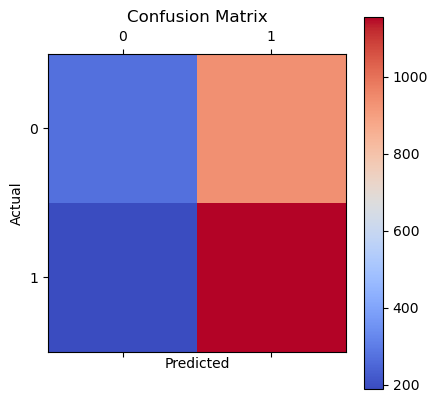

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler


# Load the merged dataset
df = pd.read_csv("merged_stock_topic_data_3.csv")

# Define the columns to normalize
# columns_to_normalize = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments", "Volatility_10", "Volatility_20",
#                       "SMA_10","SMA_20","std_10","std_20","Upper_BB_10","Lower_BB_10",  "Close", "Volume"] + list(df.columns[df.columns.str.startswith("topic_")])  # Include all topic frequency columns

columns_to_normalize = [ "Volatility_10", "Volatility_20","SMA_10","SMA_20","std_10","std_20","Upper_BB_10","Lower_BB_10",  "Close", "Volume"] + list(df.columns[df.columns.str.startswith("topic_")])  # Include all topic frequency columns
# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])



X = df[columns_to_normalize]
y = df["Direction"]

# Handling missing values
X.fillna(0, inplace=True)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plt.matshow(confusion_matrix(y_test, y_pred), cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


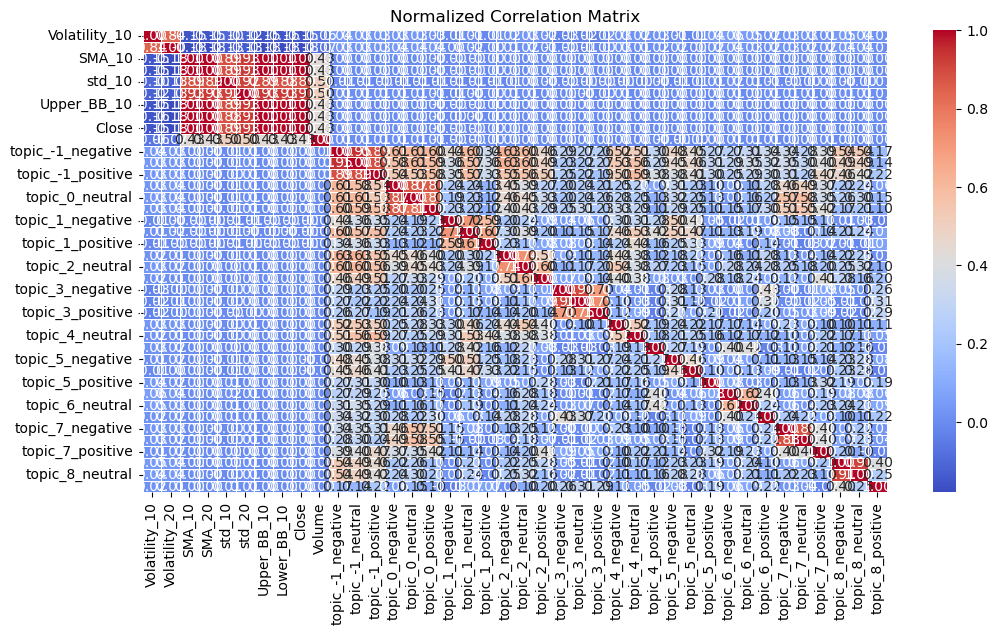

In [10]:


# Compute correlation matrix again
correlation_matrix = df[columns_to_normalize].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Normalized Correlation Matrix")
plt.show()